In [ ]:
!pip install keras-utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=e822d490f9b355de843bf29b74fc3121a128fecc60bfe1c97f270f8aef440a13
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils


In [ ]:
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")
from torchtext.vocab import GloVe
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
import numpy
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Keras-Preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from keras.preprocessing.text import Tokenizer
import string

from sklearn.metrics import confusion_matrix

!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(7,6))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()


def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

PUNCTUATION = '!#$%&()*,-./:;<=>?@^_`{|}~'

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    # text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

def pad_sequences_train(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_train['Sentence'].values)
  X_train = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_train

def pad_sequences_test(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_test['Sentence'].values)
  X_test = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_test

df_train2 = get_finance_train()
df_test2 = get_finance_test()
df_train2['Sentence'] = df_train2['Sentence'].apply(clean_text)
df_test2['Sentence'] = df_test2['Sentence'].apply(clean_text)
def run_model(X_train, y_train, X_test, y_test, epochs=5, batch_size=64, max_sequence_length=256, max_nb_words=1000, embedding_dim=300):
  if any(x is None for x in [X_train, y_train, X_test, y_test, epochs, max_sequence_length, max_nb_words, embedding_dim]):
    print('Replace the None values above with your new values before calling the run_model() function.')
    return None, None, None
  def pad_seq_train(df_train, df_test, max_seq):
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
    tokenizer.fit_on_texts(df_train['Sentence'].values)
    word_index = tokenizer.word_index
    X = tokenizer.texts_to_sequences(df_train['Sentence'].values)
    X_train = pad_sequences(X, maxlen=max_seq)
    return X_train
  def pad_seq_test(df_train, df_test, max_seq):
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
    tokenizer.fit_on_texts(df_train['Sentence'].values)
    word_index = tokenizer.word_index
    X = tokenizer.texts_to_sequences(df_test['Sentence'].values)
    X_test = pad_sequences(X, maxlen=max_seq)
    return X_test
  X_train2 = pad_seq_train(df_train2, df_test2, max_sequence_length)
  X_test2 = pad_seq_test(df_train2, df_test2, max_sequence_length)
  model = Sequential()
  model.add(Embedding(max_nb_words+1, embedding_dim, mask_zero=True, input_length=max_sequence_length))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(n_labels, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history = model.fit(X_train2,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  return model, history, test_accuracy


EMBEDDING_DIM = 300

plt.rcParams.update({'font.size': 22})

nltk.download('wordnet')

print ("Train & Test Files are loaded")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


finance_test.csv    100%[===================>]  28.58K  --.-KB/s    in 0s      
finance_train.csv   100%[===================>] 252.53K  --.-KB/s    in 0.003s  
Train & Test Files are loaded


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_train = get_finance_train()
df_test = get_finance_test()

In [ ]:
print(len(df_train))
df_train.head()

2037


,Sentence,Label
0,Autotank Group is part of Aspo 's Systems Divi...,1
1,"The contract includes design , construction , ...",1
2,Rapala said it estimates it will make savings ...,2
3,The share capital of Alma Media Corporation (b...,1
4,The financial impact is estimated to be some 1...,2


In [ ]:
print(len(df_test))
df_test.head()

227


,Sentence,Label
0,"In the third quarter of 2010 , net sales incre...",2
1,Foundries division reports its sales increased...,2
2,Financing of the project will come mainly from...,1
3,"Sukhraj Dulai , of the 2900 block of Boni Sue ...",1
4,Finland 's leading metals group Outokumpu said...,2


In [ ]:
df_train['Sentence'] = df_train['Sentence'].apply(clean_text)
df_test['Sentence'] = df_test['Sentence'].apply(clean_text)

In [ ]:
MAX_SEQUENCE_LENGTH = 256

In [ ]:
MAX_NB_WORDS = 1000

In [ ]:
### YOUR CODE HERE
X_train = pad_sequences_train(df_train, df_test)
print(X_train.shape)
print(X_train[0])
### END CODE

(2037, 256)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   

In [ ]:
### YOUR CODE HERE
X_test = pad_sequences_test(df_train, df_test)
print(X_test.shape)
### END CODE

(227, 256)


In [ ]:
### YOUR CODE HERE
y_train = pd.get_dummies(df_train['Label']).values
print(y_train)
### END CODE

[[False  True False]
 [False  True False]
 [False False  True]
 ...
 [ True False False]
 [False False  True]
 [False  True False]]


In [ ]:
### YOUR CODE HERE
y_test = pd.get_dummies(df_test['Label']).values
### END CODE

In [ ]:
n_labels = 3
label_map = {0 : "negative",
             1 : "neutral",
             2 : "positive"}

In [ ]:
#@title Run this cell to instantiate your model!

model = Sequential()
model.add(Embedding(MAX_NB_WORDS+1, EMBEDDING_DIM, mask_zero=True, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 300)          300300    
                                                                 
 spatial_dropout1d (Spatial  (None, 256, 300)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 461003 (1.76 MB)
Trainable params: 461003 (1.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2037, 256)
(2037, 3)


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
29/29 [==============================] - 47s 1s/step - loss: 0.9235 - accuracy: 0.6639 - val_loss: 0.6642 - val_accuracy: 0.7598
Epoch 2/5
29/29 [==============================] - 38s 1s/step - loss: 0.5597 - accuracy: 0.7720 - val_loss: 0.5557 - val_accuracy: 0.7843
Epoch 3/5
29/29 [==============================] - 39s 1s/step - loss: 0.3824 - accuracy: 0.8527 - val_loss: 0.4916 - val_accuracy: 0.8529
Epoch 4/5
29/29 [==============================] - 39s 1s/step - loss: 0.2430 - accuracy: 0.9187 - val_loss: 0.4725 - val_accuracy: 0.8284
Epoch 5/5
29/29 [==============================] - 37s 1s/step - loss: 0.1630 - accuracy: 0.9465 - val_loss: 0.5796 - val_accuracy: 0.8137


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 300)          300300    
                                                                 
 spatial_dropout1d (SpatialD  (None, 256, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 461,003
Trainable params: 461,003
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

8/8 [==============================] - 1s 87ms/step - loss: 0.5422 - accuracy: 0.8546


In [ ]:
training_loss = history.history["loss"]

In [ ]:
validation_loss = history.history["val_loss"]

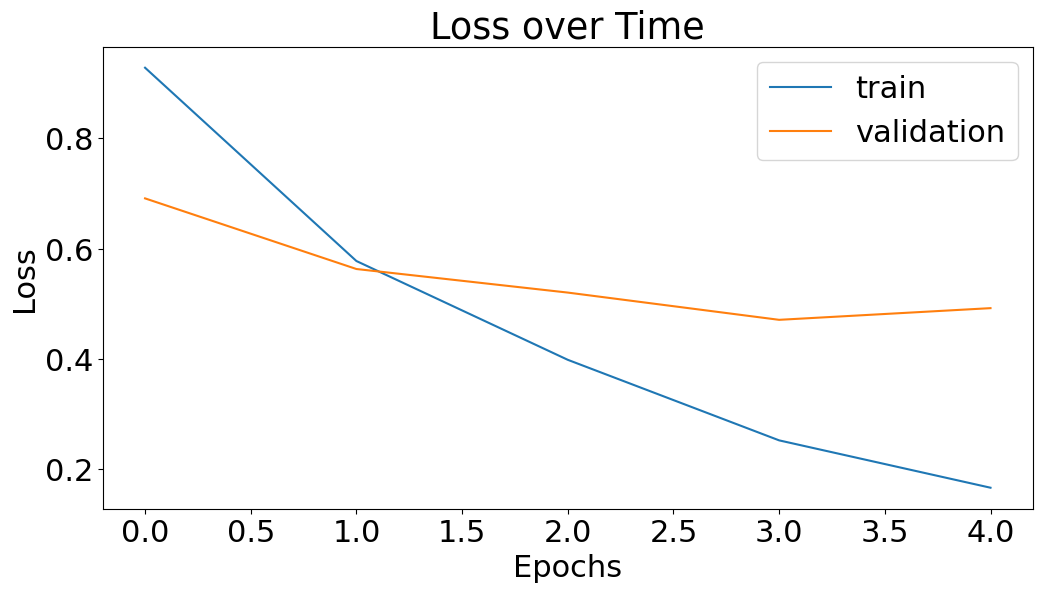

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

### YOUR CODE HERE
plt.plot(training_loss, label="train")
plt.plot(validation_loss, label="validation")

### END CODE

plt.legend()
plt.show()

In [ ]:
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

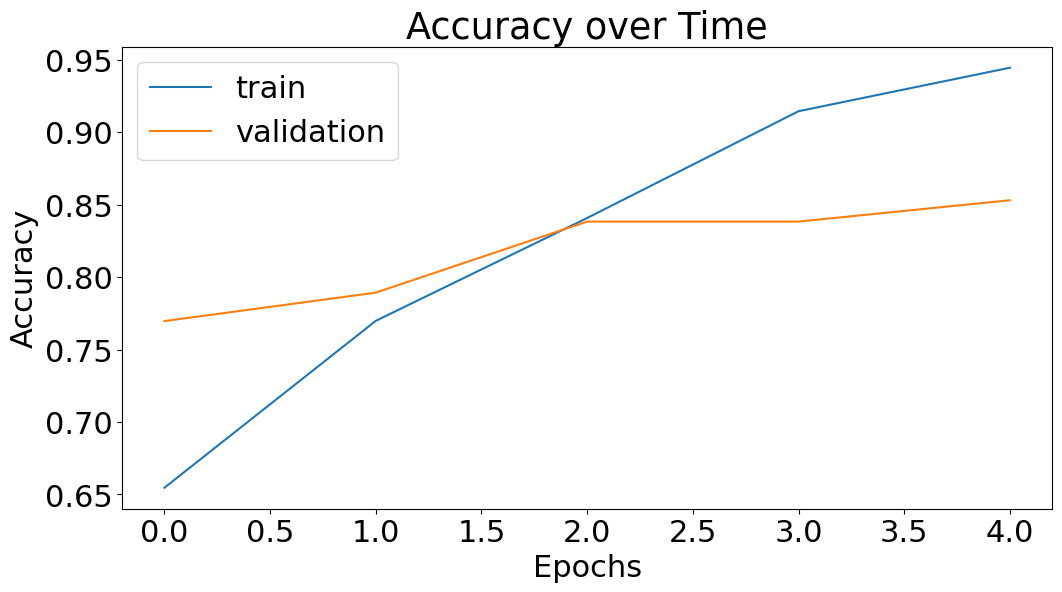

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### YOUR CODE HERE
plt.plot(training_accuracy, label="train")
plt.plot(validation_accuracy, label ="validation")

### END CODE

plt.legend()
plt.show()

In [ ]:
model, history, test_acc = run_model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=7,
    batch_size=64,
    max_sequence_length=256,
    max_nb_words=1500,
    embedding_dim=720
)
print(test_acc)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 256, 720)          1080720   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 256, 720)         0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 100)               328400    
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,409,423
Trainable params: 1,409,423
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/7
29/29 [==============================] - 49s 2s/step - loss: 0.8682 - accuracy: 0.6956 - val_lo

**Try to build the best model that you can!**

Vary parameters of your models and try to get an accuracy above **87%**!

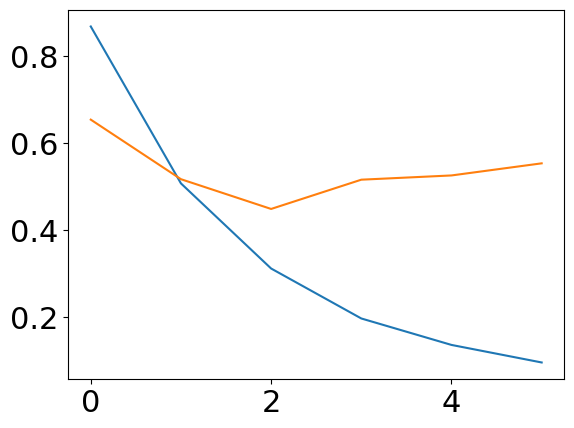

In [ ]:
### YOUR CODE HERE
training_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(training_loss)
plt.plot(val_loss)
### END CODE

8/8 [==============================] - 1s 111ms/step
Plotting the Confusion Matrix


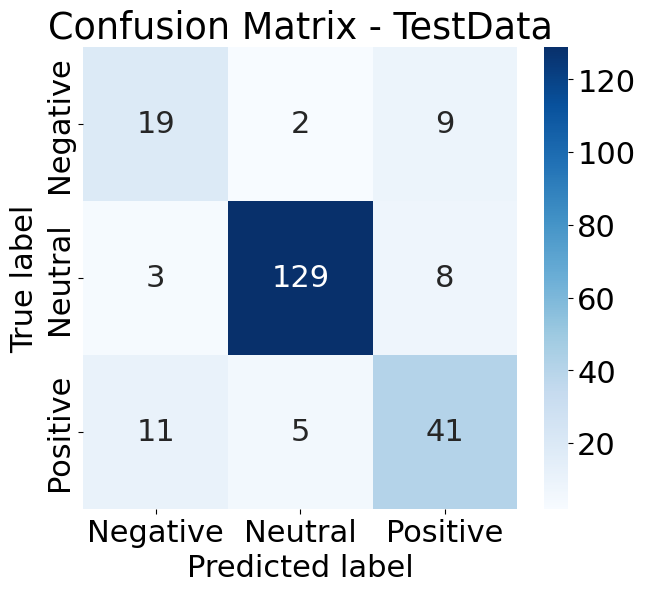

In [ ]:
# Predict on our test set
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = - 1)
y_true = y_test.argmax(axis = - 1)

# plot the confusion matrix!
plot_confusion_matrix(y_true, y_pred)